# 1: Import libraries and load data

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Download dataset from Kaggle or a hosted URL


data = pd.read_csv('Telco-Customer-Churn.csv')

# Quick look
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Data preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Fix TotalCharges
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna()

# Encode target
data['Churn'] = data['Churn'].map({'Yes':1, 'No':0})

# Encode categorical variables
cat_cols = data.select_dtypes(include=['object']).columns.drop('customerID')
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

data.head()


/tmp/ipython-input-2683414621.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Churn'] = data['Churn'].map({'Yes':1, 'No':0})
/tmp/ipython-input-2683414621.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
/tmp/ipython-input-2683414621.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


# 3. Model Training

In [6]:
X = data.drop(['customerID', 'Churn'], axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(model, 'churn_model.pkl')


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



['churn_model.pkl']

# 4. Visualize insights (dashboard-like charts)

/tmp/ipython-input-4092551195.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='importance', y='feature', palette='viridis')


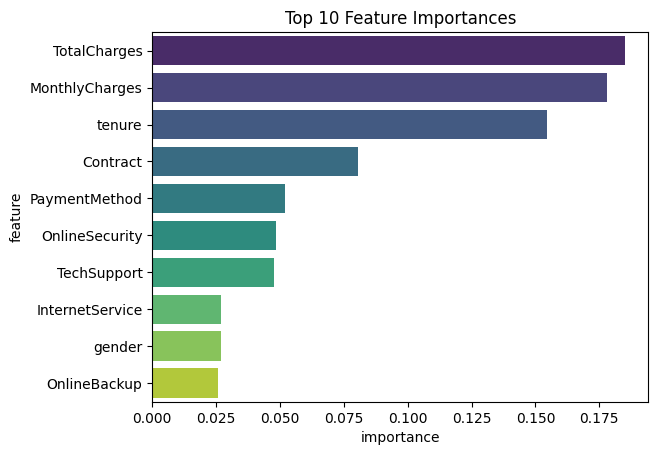

In [11]:
# 6. Feature Importance from model
importances = model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'feature': features, 'importance': importances})
feat_df = feat_df.sort_values(by='importance', ascending=False).head(10)

sns.barplot(data=feat_df, x='importance', y='feature', palette='viridis')
plt.title("Top 10 Feature Importances")
plt.show()


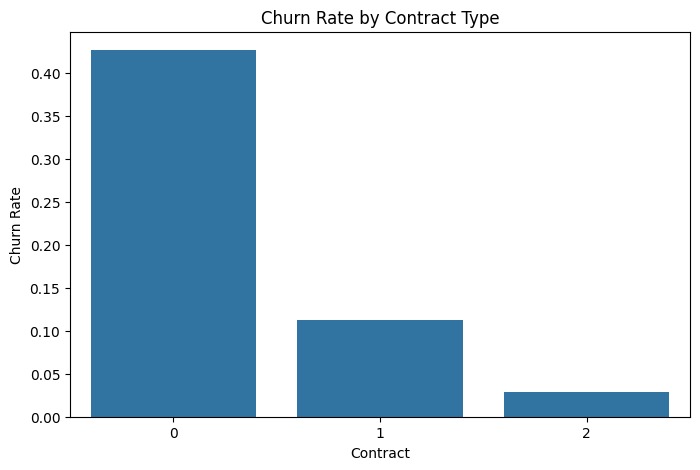

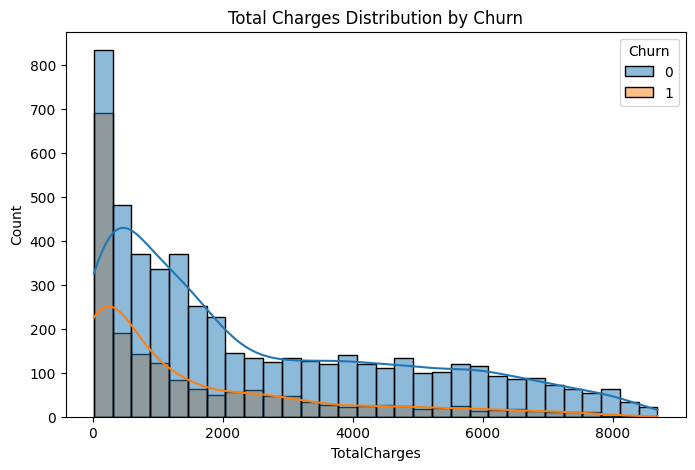

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn rate by Contract type
churn_rate = data.groupby('Contract')['Churn'].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=churn_rate.index, y=churn_rate.values)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.show()

# Distribution of TotalCharges by churn
plt.figure(figsize=(8,5))
sns.histplot(data, x='TotalCharges', hue='Churn', bins=30, kde=True)
plt.title('Total Charges Distribution by Churn')
plt.show()


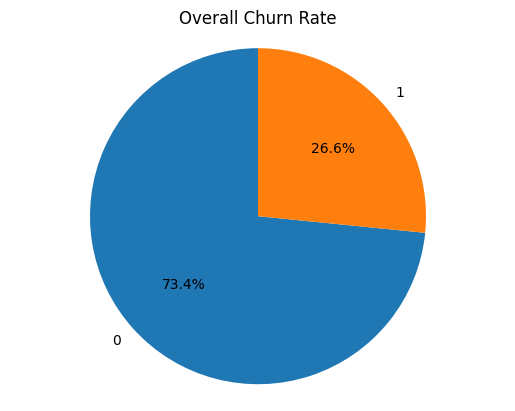

In [8]:
# 1. Pie Chart of Churn
churn_counts = data['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Overall Churn Rate')
plt.axis('equal')
plt.show()


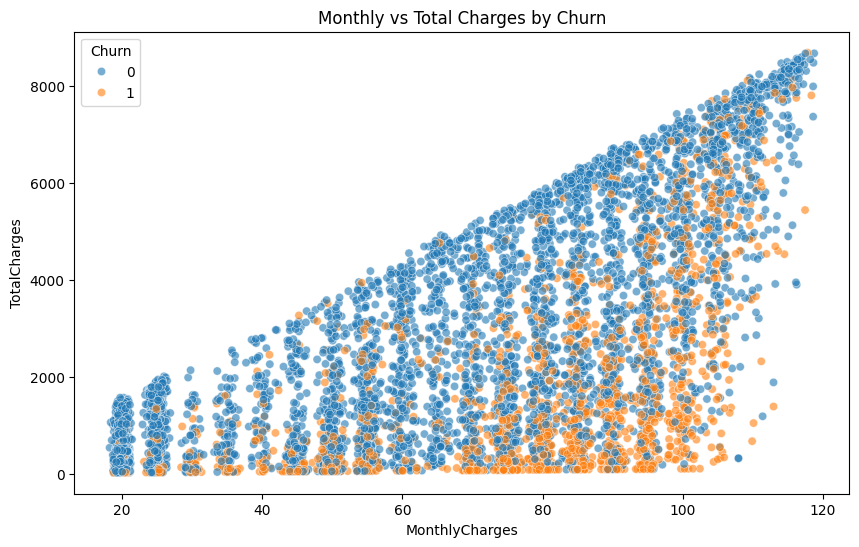

In [9]:
# 3. MonthlyCharges vs TotalCharges scatter
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.6)
plt.title('Monthly vs Total Charges by Churn')
plt.show()


# 5. Predict on new input example

In [15]:
# Create example new customer input

new_customer = {
    'gender': 1,  # assuming encoded
    'SeniorCitizen': 0,
    'Partner': 0,
    'Dependents': 0,
    'tenure': 12,
    'PhoneService': 1,
    'MultipleLines': 0,
    'InternetService': 1,
    'OnlineSecurity': 0,
    'OnlineBackup': 1,
    'DeviceProtection': 0,
    'TechSupport': 0,
    'StreamingTV': 0,
    'StreamingMovies': 0,
    'Contract': 0,
    'PaperlessBilling': 1,
    'PaymentMethod': 0,
    'MonthlyCharges': 70.0,
    'TotalCharges': 70.0
}

import numpy as np

new_customer_df = pd.DataFrame([new_customer])
pred_prob = model.predict_proba(new_customer_df)[0][1]
print(f"Predicted churn probability: {pred_prob:.2f}")


Predicted churn probability: 0.57
